In [1]:
from sklearn import svm
import numpy as np
import pandas as pd
import csv
import pdb
import os
import matplotlib.pyplot as plt
import timeit
from joblib import dump, load

In [2]:
def load_data(directory, target_var):
    print("Loading data")
    full_data = []
    if directory[-1] != '/':
        directory = directory + '/'
    for root,dir,files in os.walk(directory):
        for file in files:
            if file.endswith(".csv"):
                filepath = directory + file
#                 print('Loading: ', file)
                csv_data = np.genfromtxt(filepath, delimiter=',')
                full_data.append(csv_data)
    features = np.vstack(full_data)
    ground_truth = features[:,target_var]
    features = np.delete(features, target_var, axis=1)
    
    return features, ground_truth, full_data
    

In [3]:
def load_file(filepath, target_var):
    csv_data = np.genfromtxt(filepath, delimiter=',')
    ground_truth = csv_data[:, target_var]
    features = np.delete(csv_data, target_var, axis=1)

    return features, ground_truth

In [4]:
truth_index = 2
start = timeit.default_timer()
training_features, training_truth, _ = load_data('/mnt/d/git/heat_chamber_code/jupyter/train/', truth_index)

Loading data


In [5]:
clf = svm.SVR()
clf.fit(training_features, training_truth)
dump(clf, 'svm_model.joblib')

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['svm_model.joblib']

In [6]:
test_features, test_truth, run_list = load_data('/mnt/d/git/heat_chamber_code/jupyter/test/', truth_index)
score = clf.score(test_features, test_truth)
prediction_array = []
truth_array = []
for run in range(len(run_list)):
    run_predictions = []
    run_truth = []
    for row in run_list[run]:
        run_truth.append(row[truth_index])
        row = np.delete(row, truth_index)
        prediction = clf.predict([row])
        run_predictions.append(prediction)
    run_predictions = np.vstack(run_predictions)
    run_truth = np.vstack(run_truth)
    prediction_array.append(run_predictions)
    truth_array.append(run_truth)

Loading data


In [7]:
print("Score: ", score)

Score:  0.03988735902543372


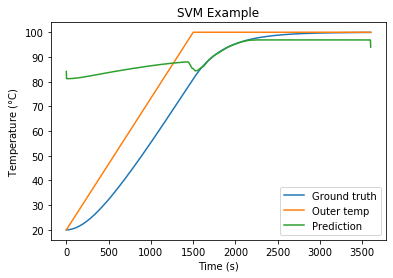

Time:  962.3887760999999


In [8]:
for i in range(len(run_list)):
    plt.figure
    plt.plot(range(len(truth_array[i])), truth_array[i], label="Ground truth")
    plt.plot(range(len(truth_array[i])), run_list[i][:,1], label="Outer temp")
    plt.plot(range(len(truth_array[i])), prediction_array[i], label="Prediction")
    plt.legend(loc="lower right")
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature ($\degree$C)')
    plt.title('SVM Example')
    plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)  